In [14]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Reading</p>

In [15]:

train = pd.read_csv('../dataset/train.csv')
test  = pd.read_csv('../dataset/test.csv')
org = pd.read_csv("../dataset/jm1.csv")

In [16]:
train=pd.concat([train.drop("id",axis=1), org], ignore_index=True)
test.drop("id",axis=1, inplace=True)

In [17]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
loc,22.0,14.0,11.0,8.0,11.0,23.0,24.0,14.0,34.0,9.0
v(g),3.0,2.0,2.0,1.0,2.0,4.0,4.0,1.0,10.0,2.0
ev(g),1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
iv(g),2.0,2.0,2.0,1.0,2.0,3.0,4.0,1.0,4.0,2.0
n,60.0,32.0,45.0,23.0,17.0,69.0,60.0,49.0,122.0,16.0
v,278.63,151.27,197.65,94.01,60.94,338.21,294.41,221.65,684.98,55.35
l,0.06,0.14,0.11,0.19,0.18,0.07,0.08,0.18,0.07,0.11
d,19.56,7.0,8.05,5.25,5.63,14.15,12.46,5.47,14.33,9.0
i,14.25,21.11,22.76,17.86,12.44,22.81,24.62,46.06,43.43,6.15
e,5448.79,936.71,1754.01,473.66,365.67,3772.51,3295.25,1183.48,9941.84,498.16


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Cleaning</p>

In [18]:
fakers=[col for col in train.columns if (train[col].dtype=="O") & (train[col].nunique()>10)]
fakers

['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

In [19]:
train["uniq_Op"][train["uniq_Op"]=="?"]

101906    ?
102121    ?
103361    ?
105977    ?
110042    ?
Name: uniq_Op, dtype: object

In [20]:
def question_marks_to_NaN(df):
    for col in df.columns:
        df[col]=np.vectorize(lambda x: np.NaN if x == "?" else x)(df[col])
question_marks_to_NaN(train)
question_marks_to_NaN(test)

In [21]:
train[fakers]=train[fakers].astype("float64")
test[fakers]=test[fakers].astype("float64")
train[fakers]=train[fakers].fillna(train[fakers].mode().iloc[0])
test[fakers]=test[fakers].fillna(test[fakers].mode().iloc[0])

In [22]:
train.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Looks like we have faker columns which act like an object while they are just numbers, also some of them have missing value but it looks like a question mark, lets convert them to NaN then fill the NaN values with mode of this columns.

In [23]:
train.duplicated().sum()

1973

In [24]:
train = train.drop_duplicates()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Let's also drop the duplicated 1973 column in the train set, don't clear the duplicates in the test set, your submission should be the same size of the competition wants.

In [25]:
num_cols=[col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]
num_cols

['loc',
 'v(g)',
 'ev(g)',
 'iv(g)',
 'n',
 'v',
 'l',
 'd',
 'i',
 'e',
 'b',
 't',
 'lOCode',
 'lOComment',
 'lOBlank',
 'uniq_Op',
 'uniq_Opnd',
 'total_Op',
 'total_Opnd',
 'branchCount']

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Target</p>

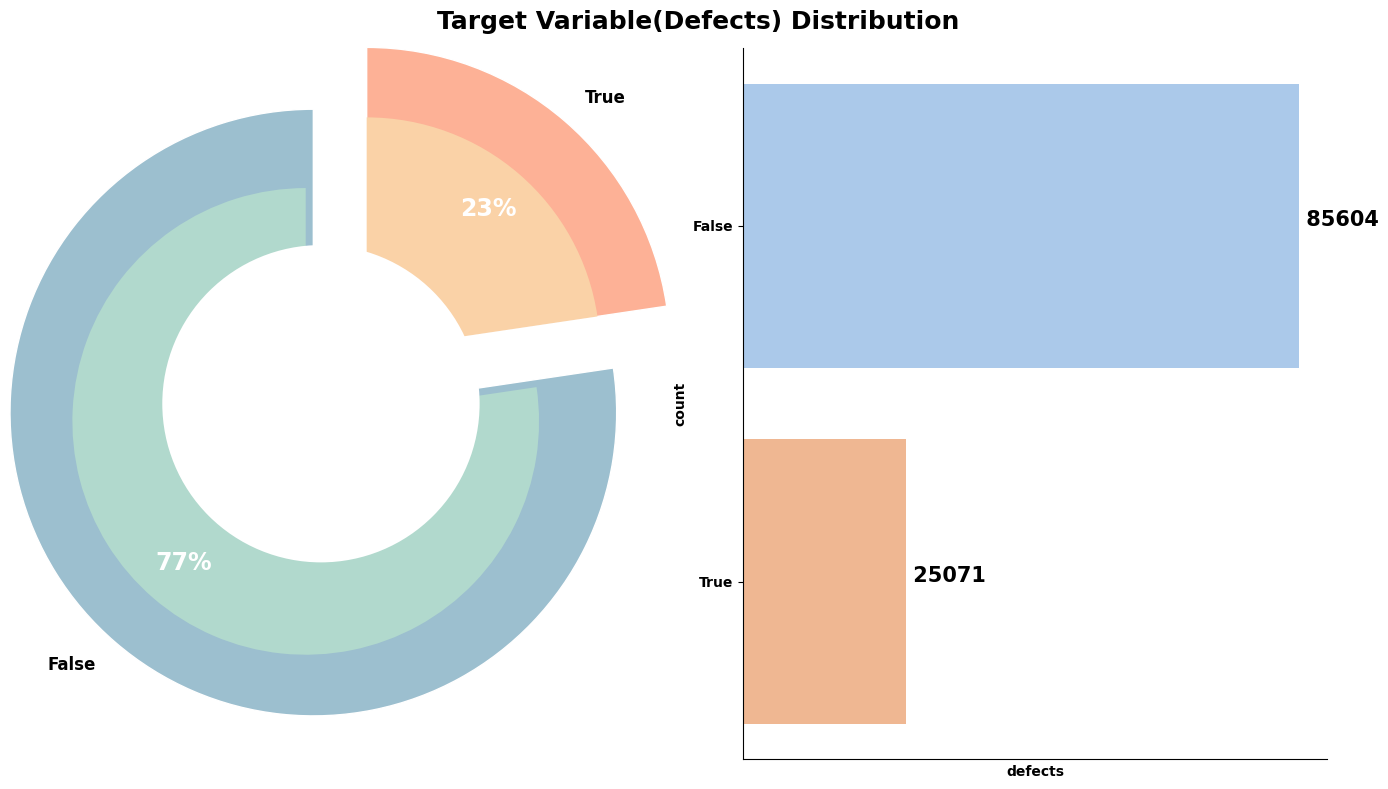

In [26]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 8))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9CBFCF', '#FDB196']
    inner_colors = ['#B1D9CD', '#FAD2A7']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 17, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='pastel', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i, " "+str(v), color='black', fontweight='bold', fontsize=15)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_count(train, 'defects', 'Target Variable(Defects) Distribution')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  It looks like 23% of Target is True and 77% is False, so we have an imbalanced data, we should take it into consideration twice when modeling, do division with "stratify" before modelling, and calculate accuracy with methods that work well with imbalance data.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Categorical</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  so, yes we don't have Categorical data, but some numerics look like categorical, we will check it later if need. (checked, don't need)
    

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Numerical</p>

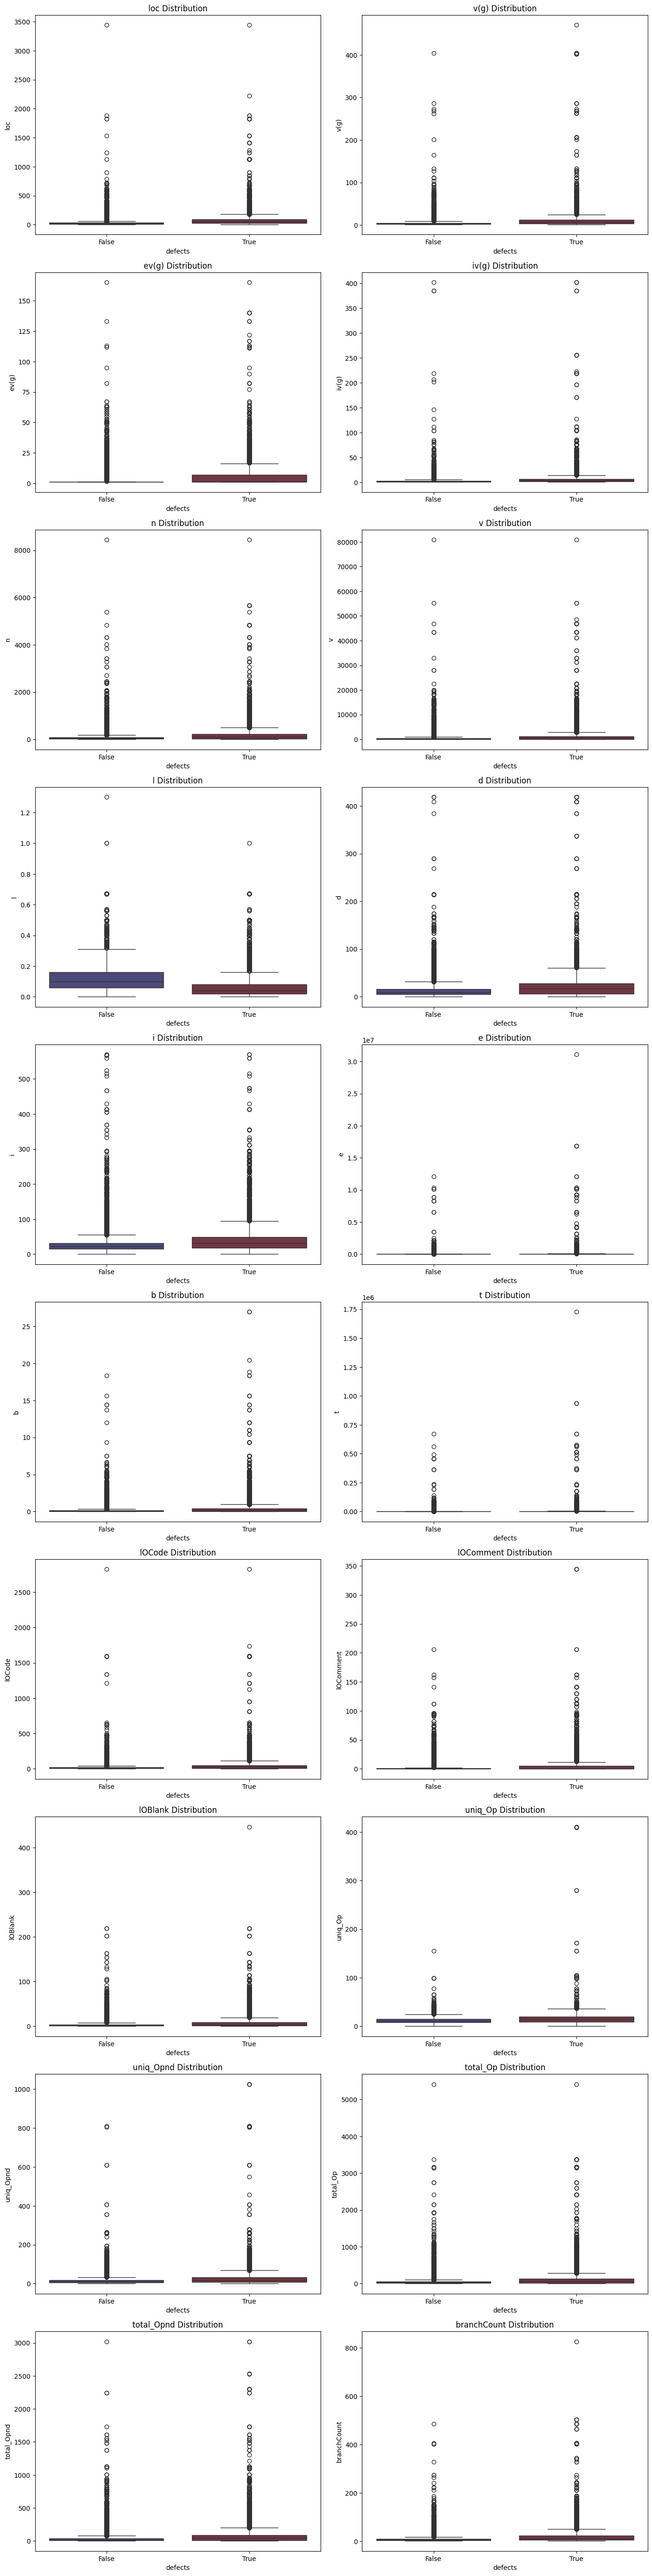

In [27]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="defects", y=column, data=train,palette="icefire")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

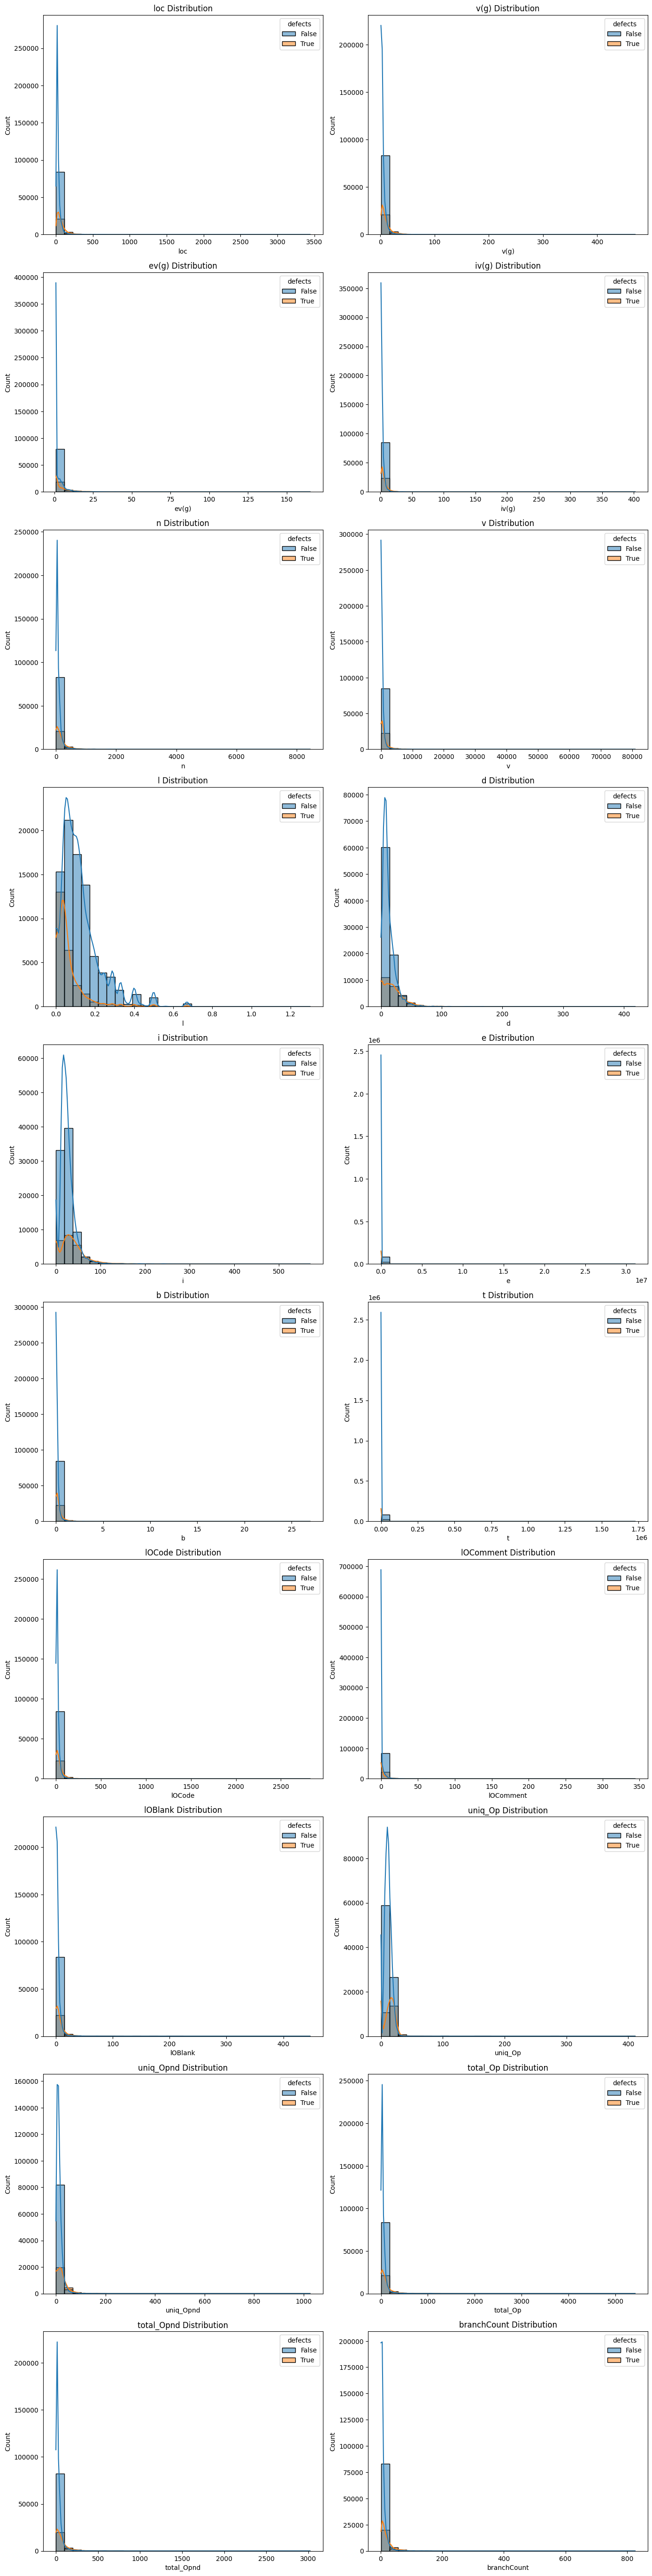

In [28]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="defects", data=train,bins=30,kde=True)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<Axes: >

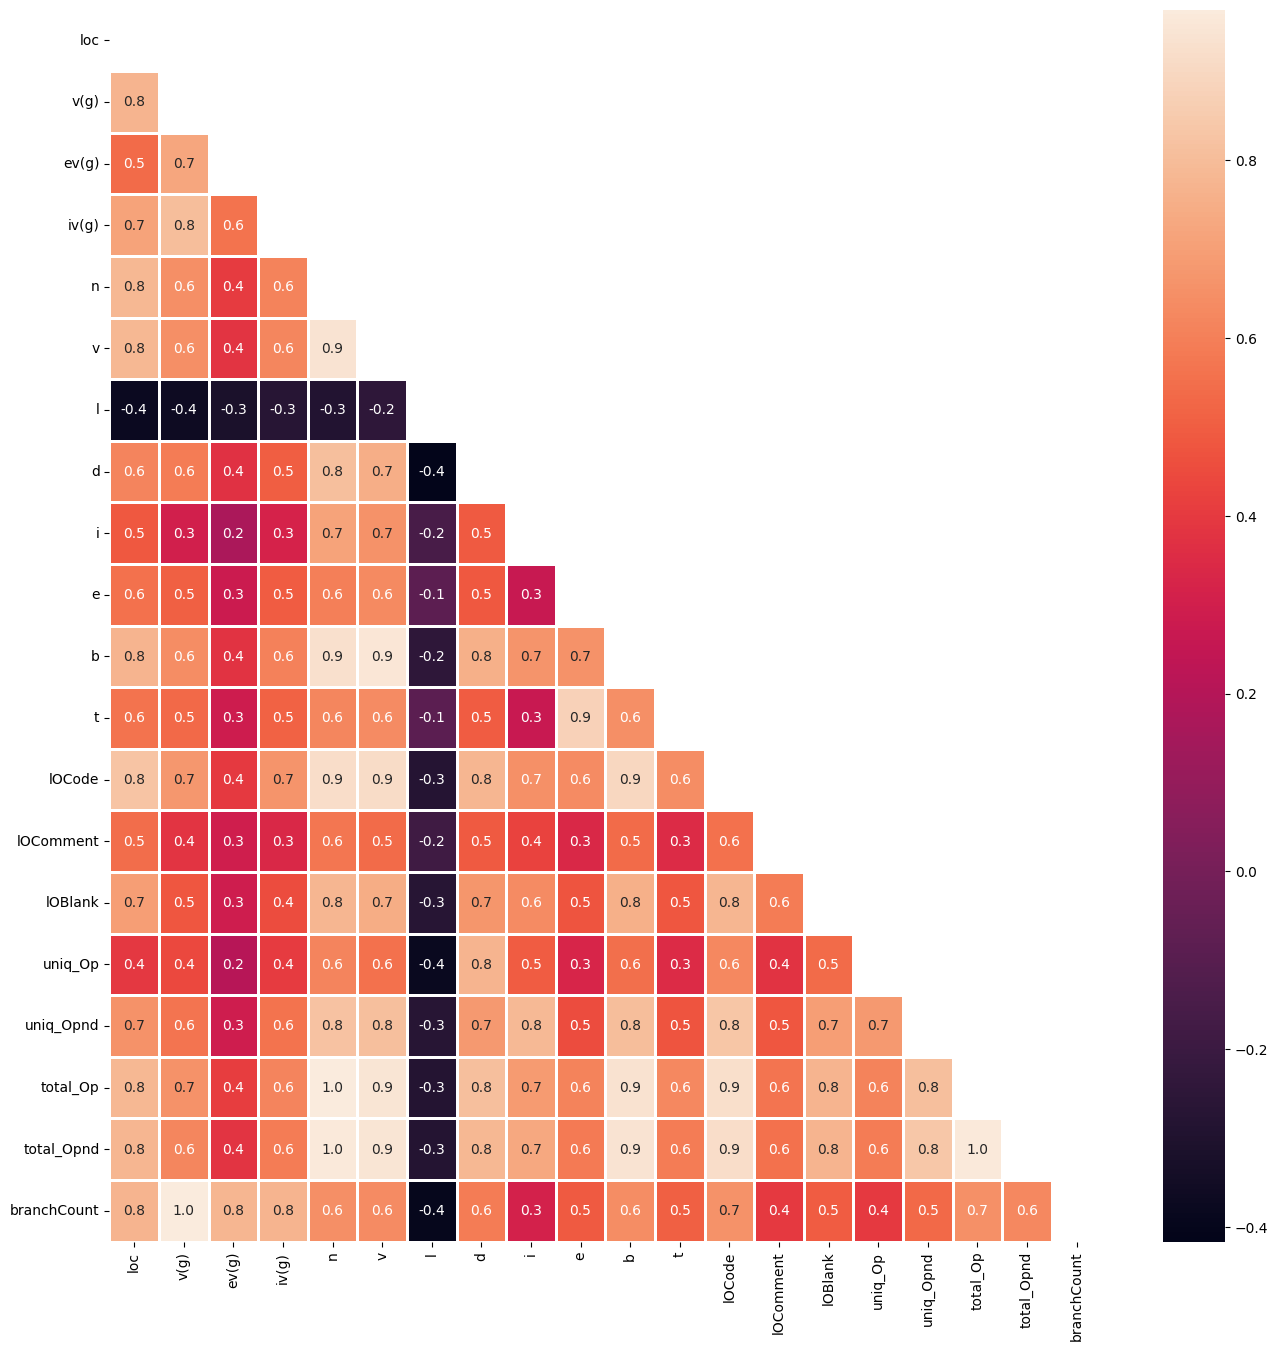

In [29]:
plt.figure(figsize=(16,16))
corr=train[num_cols].corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Looks like we have highly correlated features, a lot of outliners and skewed data. Lets take care them one by one, dop one of columns which has high correlation, and max,min limit outliner, then fix the skewness of the data. But before droping correlation over 0.9, we should take care of outliners and skewness.

In [30]:
train["defects"]=train["defects"].map({False: 0,True: 1})

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Converted defects to numeric  for modeling.

In [31]:
def new_features(df):
    df["complexity"] = df["v(g)"] * df["ev(g)"] * df["iv(g)"]
    df["ComplexEffort"] =  df["complexity"] * df["e"]
    df["LocToLen"] = df["loc"] / (df["l"] + 0.0001)
new_features(train)
new_features(test)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>🛠️ New Features:</font></h3>
    
*  **complexity**: Calculates Total Complexity of the Code
*  **ComplexityEffort**: Calculates Complexity per effort
*  **LocToLen**: Calculates Code Length / Program Length

In [32]:
def corr_skew_outliner(df, cols):

    #outliner and #skewness part
    for col in cols:
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.95)
        df.loc[df[col] < Q1, col] = Q1
        df.loc[df[col] > Q3, col] = Q3
        df[col] = np.sqrt(df[col])
        
    #correlation part
    correlation = df[cols].corr().abs()
    triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
    drop_list = [column for column in triangle.columns if any(triangle[column] > 0.91)]
    df.drop(drop_list, axis=1, inplace=True)
        
    return df

In [33]:
train = corr_skew_outliner(train,train.drop(["defects"],axis=1).columns)
test = corr_skew_outliner(test,test.columns)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
new_num_cols=[col for col in train.columns if (train[col].dtype in ["int64","float64"])]

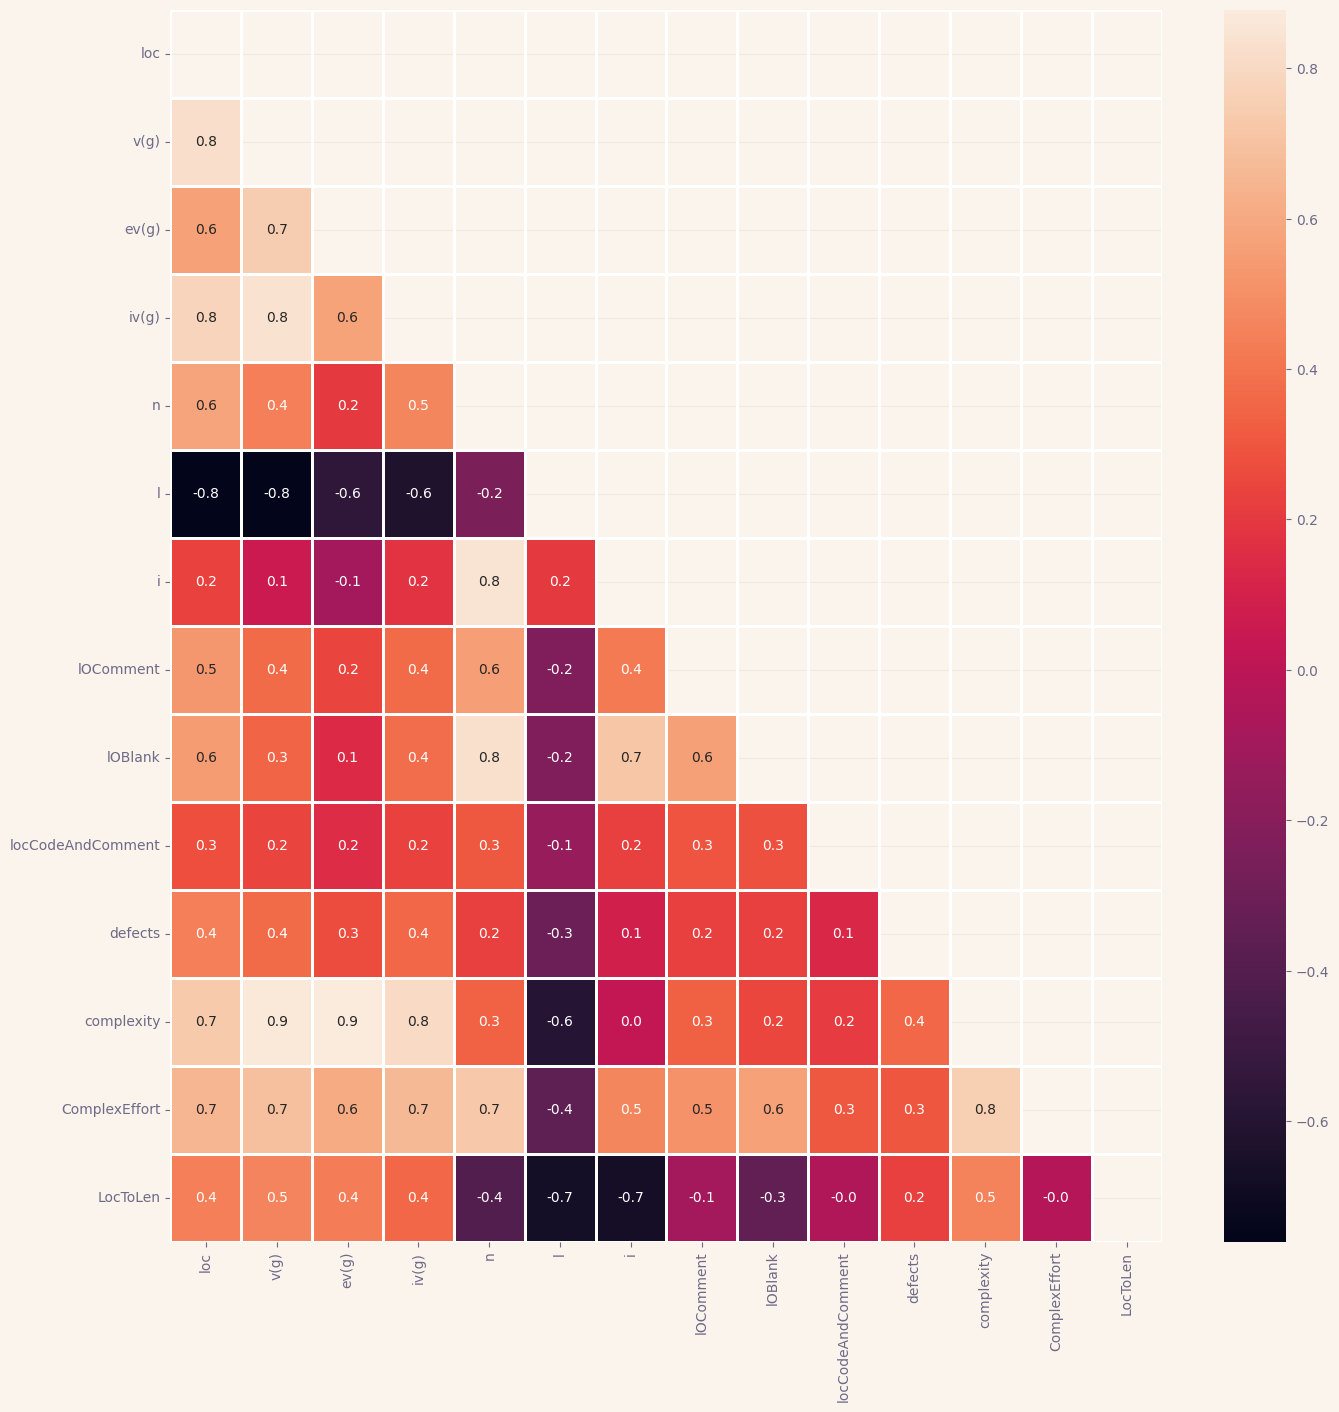

In [ ]:
plt.figure(figsize=(16,16))
corr=train.corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Dropped highly correlated features after taking care of outliners and skewness

In [ ]:
[print(f" Drop : {x}") for x in (set(num_cols)-set(new_num_cols))];

 Drop : uniq_Opnd
 Drop : uniq_Op
 Drop : lOCode
 Drop : b
 Drop : total_Opnd
 Drop : v
 Drop : total_Op
 Drop : d
 Drop : t
 Drop : e
 Drop : branchCount


# <p style="background-color:#8B0000; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚖️Modeling⚖️</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  You can reduce the size of data with PCA here, but I wont on this notebook.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Split</p>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
X= train.drop("defects", axis=1)
y= train["defects"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 972, stratify=y)



### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Feature Importance</p>

0.6693092304984893

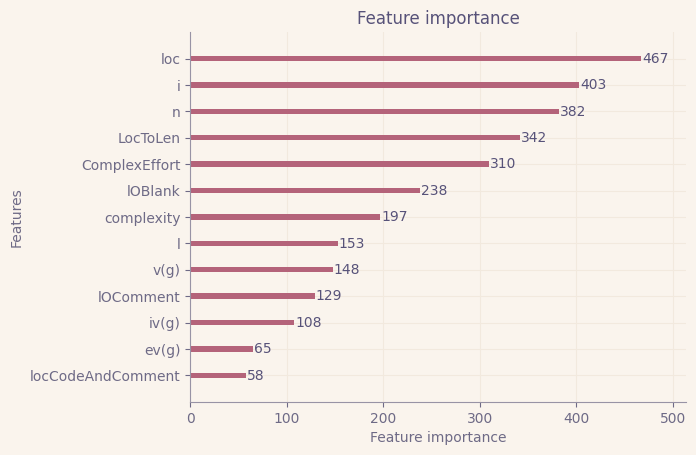

In [ ]:
import lightgbm
lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
roc_auc_score(y_test,lgb.predict(X_test))

0.6655042787099521

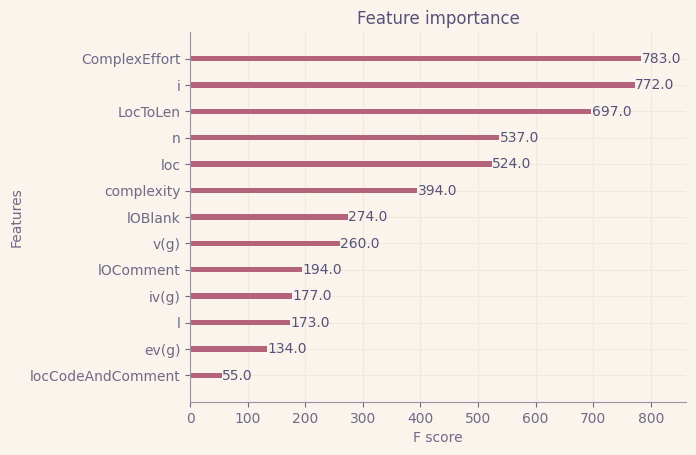

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
roc_auc_score(y_test,xgb.predict(X_test))

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">XGBoost Classifier</p>

In [ ]:
from xgboost import XGBClassifier
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'tree_method': trial.suggest_categorical('tree_method', ['gpu_hist']),
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),
    }
    model_xgb = XGBClassifier(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return roc_auc_score(y_test,y_pred)

In [ ]:
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.012267210360351983, 'n_estimators': 686, 'min_child_weight': 4, 'gamma': 8.514563410696744e-06, 'subsample': 0.752826830753619, 'reg_alpha': 0.5394256222369659, 'reg_lambda': 0.7862600597417762, 'seed': 42, 'tree_method': 'gpu_hist', 'objective': 'binary:logistic'}


In [ ]:
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('ROC: ', roc_auc_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

ROC:  0.6735173985682048
Accuracy:  0.81893747741236


In [ ]:
sub["defects"]=voting.predict_proba(test)[:, 1]
sub.to_csv('submission.csv',index=False)
sub

,id,defects
0,101763,0.205676
1,101764,0.175681
2,101765,0.656397
3,101766,0.485147
4,101767,0.156340
...,...,...
67837,169600,0.219218
67838,169601,0.119293
67839,169602,0.168150
67840,169603,0.112629
